In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
import torchvision

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import imageio
from glob import glob

%matplotlib inline

In [4]:
class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.size(0), -1)
    
class Reshape(nn.Module):
    def __init__(self, *dims):
        super(Reshape, self).__init__()
        self.dims = dims
        
    def forward(self, x):
        return x.view(*self.dims)

In [23]:
input_dim = 16*16*3

encoder = nn.Sequential(
    Flatten(),
    nn.Linear(input_dim, 500),
    nn.ReLU(),
    
    nn.Linear(500, 500),
    nn.ReLU(),
    
    nn.Linear(500, 10),
    nn.ReLU()
)

decoder = nn.Sequential(
    nn.Linear(10, 500),
    nn.ReLU(),
    
    nn.Linear(500, 500),
    nn.ReLU(),
    
    nn.Linear(500, input_dim),
    nn.Sigmoid(),
    
    Reshape(-1, 16, 16, 3)
)

autoencoder = nn.Sequential(encoder, decoder).cuda()

In [17]:
X = np.stack([imageio.imread(img)[:,:,:3] for img in glob("downloads/*.png")], axis=0)
X = torch.from_numpy(X).float().cuda()

In [48]:
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)

43196.7578125
43196.7578125
43196.7578125
43196.7578125
43196.7578125
43196.7578125
43196.7578125
43196.7578125
43196.7578125
43196.7578125


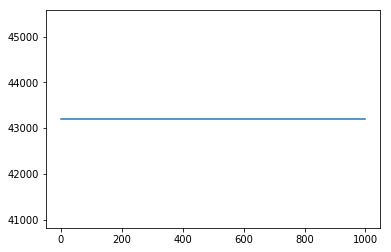

In [49]:
losses = []

for i in range(1000):
    X_hat = autoencoder(X)

    optimizer.zero_grad()
    loss = criterion(X_hat, X)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if i % 100 == 0: print(loss.item())
        
plt.plot(losses)

In [43]:
loss.item()

43199.828125

In [50]:
np.stack([-2 * np.ones(5), np.linspace(-2, 2, 5)])

array([[-2., -2., -2., -2., -2.],
       [-2., -1.,  0.,  1.,  2.]])

In [51]:
X = np.stack([imageio.imread(img)[:, :, :3] for img in glob("downloads/*.png")], axis=0)

In [54]:
X.min()

0